In [24]:
import os
os.chdir(r'C:\Users\santh_000\Desktop\Kaggle\Iris')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from keras.utils import to_categorical

In [26]:
import seaborn as sns
sns.set_style("whitegrid")

In [27]:
data=pd.read_csv('iris.csv')

In [28]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


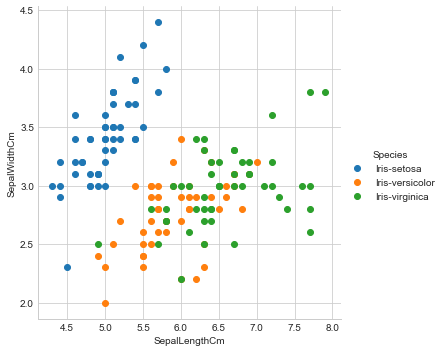

In [30]:
sns.FacetGrid(data, hue = 'Species', size=5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()

In [32]:
dataset = data.iloc[:,1:5].values
labels = data.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
label_enc = encoder.fit_transform(labels)

Y = pd.get_dummies(label_enc).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(dataset,Y,test_size=0.25) 

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
net=Sequential()
net.add(Dense(output_dim=6,init='uniform',activation='relu',input_dim=4))
net.add(Dense(output_dim=6,init='uniform',activation='relu'))
net.add(Dense(output_dim=3,init='uniform',activation='softmax'))
net.compile(Adam(lr=0.01),'categorical_crossentropy',metrics=['accuracy'])
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [77]:
net.fit(X_train,y_train,batch_size=5,epochs=100)
y_pred = net.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
112/112 [==============================] - 0s 4ms/step - loss: 1.0834 - acc: 0.3125
Epoch 2/100
112/112 [==============================] - 0s 419us/step - loss: 0.8978 - acc: 0.5089
Epoch 3/100
112/112 [==============================] - 0s 337us/step - loss: 0.5759 - acc: 0.7411
Epoch 4/100
112/112 [==============================] - 0s 419us/step - loss: 0.3811 - acc: 0.8929
Epoch 5/100
112/112 [==============================] - 0s 477us/step - loss: 0.3306 - acc: 0.8125
Epoch 6/100
112/112 [==============================] - ETA: 0s - loss: 0.2925 - acc: 0.800 - 0s 279us/step - loss: 0.2406 - acc: 0.9196
Epoch 7/100
112/112 [==============================] - 0s 419us/step - loss: 0.1654 - acc: 0.9643
Epoch 8/100
112/112 [==============================] - 0s 477us/step - loss: 0.1494 - acc: 0.9554
Epoch 9/100
112/112 [==============================] - 0s 477us/step - loss: 0.1488 - acc: 0.9464
Epoch 10/100
112/112 [==============================] - 0s 419us/step - loss: 0.14

112/112 [==============================] - 0s 418us/step - loss: 0.1382 - acc: 0.9375
Epoch 84/100
112/112 [==============================] - 0s 337us/step - loss: 0.0946 - acc: 0.9643
Epoch 85/100
112/112 [==============================] - 0s 418us/step - loss: 0.0512 - acc: 0.9821
Epoch 86/100
112/112 [==============================] - 0s 477us/step - loss: 0.0692 - acc: 0.9643
Epoch 87/100
112/112 [==============================] - 0s 558us/step - loss: 0.0723 - acc: 0.9732
Epoch 88/100
112/112 [==============================] - 0s 337us/step - loss: 0.0731 - acc: 0.9732
Epoch 89/100
112/112 [==============================] - 0s 558us/step - loss: 0.0680 - acc: 0.9732
Epoch 90/100
112/112 [==============================] - 0s 337us/step - loss: 0.0685 - acc: 0.9554
Epoch 91/100
112/112 [==============================] - 0s 418us/step - loss: 0.0633 - acc: 0.9821
Epoch 92/100
112/112 [==============================] - 0s 337us/step - loss: 0.1342 - acc: 0.9375
Epoch 93/100
112/112 [=

In [78]:
from sklearn.metrics import confusion_matrix


In [79]:
print(confusion_matrix(y_test_class,y_pred_class))

[[17  0  0]
 [ 0  6  0]
 [ 0  1 14]]
